In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#koneksi dari COLAB ke Gdrive

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Loading Data

path='/content/drive/MyDrive/DataSource/credit_risk_1.csv'
load_data_cc=pd.read_csv(path)

load_data_cc.head()
#head = 5 baris teratas
#tail(10) = 10 baris terbawah

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [ ]:
df = pd.DataFrame(load_data_cc)
df

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...,...
695,695,36,2,6,15,27,4.6,0.262062,0.979938,1.0
696,696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,698,45,1,19,22,77,8.4,2.302608,4.165392,0.0


## Business Understanding

Salah satu bank terkemuka ingin memprediksi nasabah yang terindikasi kredit macet saat mengajukan pinjaman. Pemberi pinjaman biasanta membuat dua jenis keputusan :

1.  Apakah akan memberi kredit kepada pemohon baru.
2.  Bagaimana menangani pemohon yang sudah ada,termasuk apakah akan meningkatkan batas kredit mereka.
### Dalam kedua kasus,apapun teknik yang digunakan,sangat penting bahwa ada sampel besar pelanggan sebelumnya dengan detail aplikasi, pola perilaku, dan riwayat kredit berikutnya yang tersedia. Sebagian besar teknik menggunakan sampel ini untuk mengidentifikasi hubungan antara karakteristik konsumen (pendapatan tahunan,usia,jumlah tahun bekerja dengan pemberi kerja saat ini,dll) Dan riwayat mereka selanjutnya. Area aplikasi khasi di pasar konsumen meliputi kartu kredit,pinjaman mobil,hipotek rumah,pinjaman ekuitas rumah,pesanan katalog surat, dan berbagai macam produk pinjaman pribadi.



##Goal
1. Prediksi potensi nasabah gagal bayar. Problem : Klasifikasi

Kemungkinan algoritma :

A. Desicion Tree

B.SVM

C. Random Forest

D. XGboost Tree Classification


2. prediksi nilai kredit yang akan diberikan kepada nasabah lama (old nasabah). Problem : Estimasi

##Data Description
There are 9 attributes containing 850 customer records followed by:

age : umur nasabah.

ed : level pendidikan nasabah.

employ : Masa jabatan dengan pemberi kerja saat ini (dalam tahun).

address : Jumlah tahun di alamat yang sama.

income : pendapatan nasabah.

debtinc : Debt to income ratio (Rasio hutang terhadap pendapatan). Rasio hutang terhadap pendapatan adalah semua pembayaran hutang bulanan anda dibagi dengan pendapatan kotor bulanan anda. Angka ini adalah salah satu cara pemberi pinjaman mengukur kemampuan anda untuk mengelola pembayaran bulanan untuk melunasi utang yang anda rencanakan untuk dipinjam. Rasio hutang terhadap pendapatan anda tidak secara langsung mempengaruhi nilai kredit anda. ini karena lembaga kredit tidak tahu berapa banyak uang yang anda peroleh,sehingga mereka tidak dapat melakukan perhitungan.

creddebt : Credit to debt ratio (Rasio kredit terhadap utang) Menunjukkan bahwa persentase rasio hutang terhadap kredit yang baik di bawah 30%. Dan itu berlaku untuk rasio anda pada salah satu kartu anda secara terpisah serta untuk rasio keseluruhan anda.

othdebt : utang lainnya.

default : label pelanggan gagal di masa lalu (1 = gagal, 0 = tidak pernah gagal) ** Variabel Target **

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  700 non-null    int64  
 1   age         700 non-null    int64  
 2   ed          700 non-null    int64  
 3   employ      700 non-null    int64  
 4   address     700 non-null    int64  
 5   income      700 non-null    int64  
 6   debtinc     700 non-null    float64
 7   creddebt    700 non-null    float64
 8   othdebt     700 non-null    float64
 9   default     700 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 54.8 KB


In [ ]:
df['ed'].value_counts()

1    372
2    198
3     87
4     38
5      5
Name: ed, dtype: int64

In [ ]:
df['age'].value_counts()

29    44
28    37
39    37
31    36
41    34
34    33
36    29
27    28
40    27
35    27
32    25
33    25
30    24
24    24
38    23
26    23
37    22
25    20
23    18
43    17
42    16
47    16
45    16
48    15
46    13
22    12
21    10
44     9
50     8
52     7
53     6
51     6
54     4
49     4
55     2
20     2
56     1
Name: age, dtype: int64

<Axes: xlabel='variable', ylabel='value'>

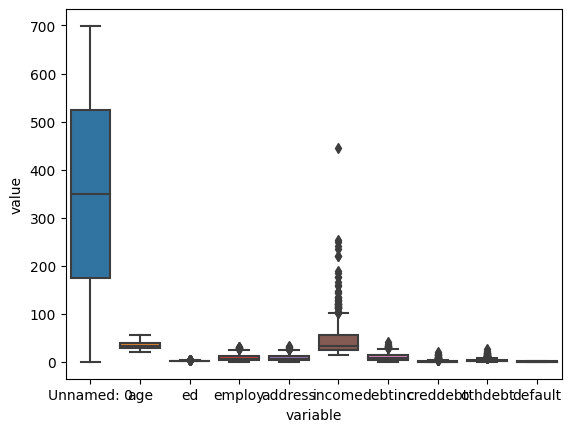

In [ ]:
sns.boxplot(x='variable', y='value', data=pd.melt(df))

In [ ]:
dfx=df[['age', 'ed', 'employ', 'address', 'debtinc', 'creddebt', 'othdebt', 'default']]

<Axes: xlabel='variable', ylabel='value'>

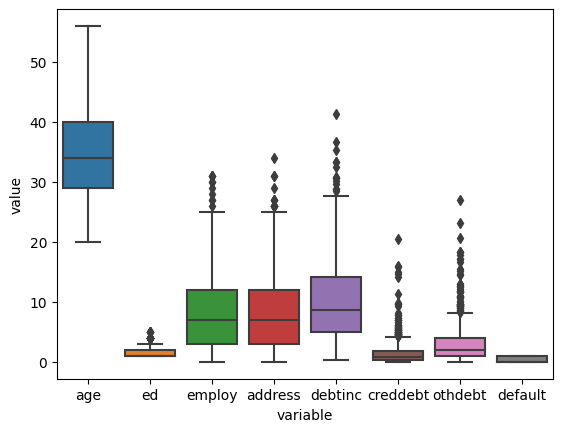

In [ ]:
sns.boxplot(x='variable', y='value', data=pd.melt(dfx))

In [ ]:
dfx1=df[['ed','creddebt', 'othdebt']]

<Axes: xlabel='variable', ylabel='value'>

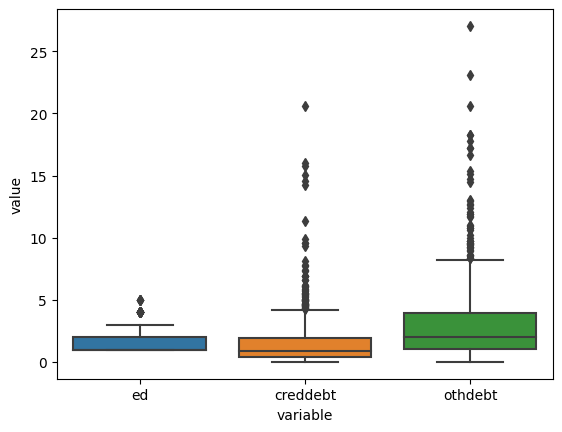

In [ ]:
sns.boxplot(x='variable', y='value', data=pd.melt(dfx1))

<Axes: xlabel='variable', ylabel='value'>

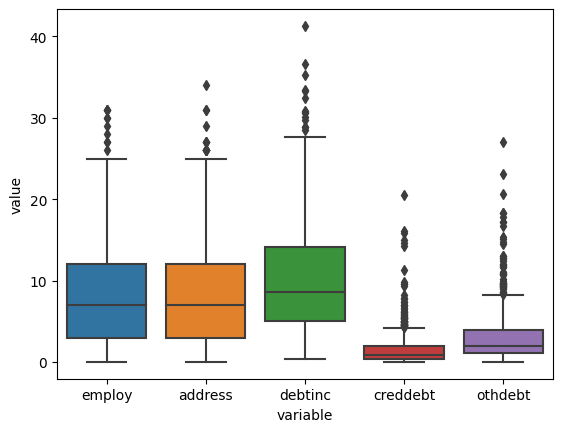

In [ ]:
dfx2=df[['employ', 'address', 'debtinc', 'creddebt', 'othdebt']]
sns.boxplot(x='variable', y='value', data=pd.melt(dfx2))

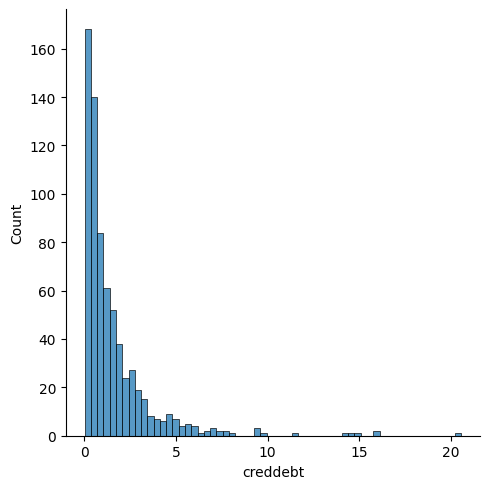

In [ ]:
sns.displot(x='creddebt', data=dfx2)

<Axes: xlabel='age', ylabel='count'>

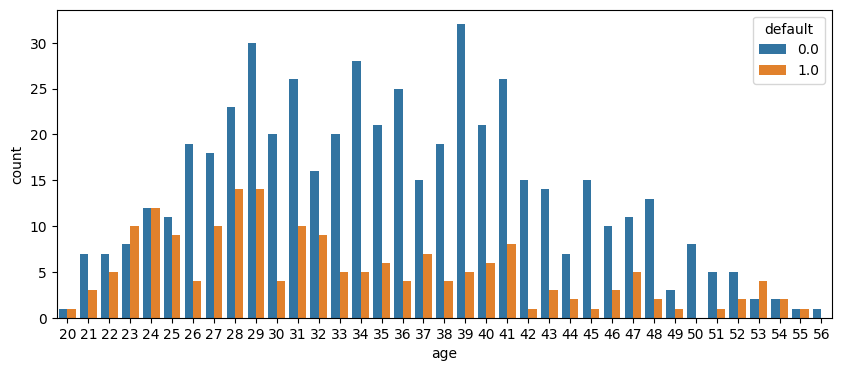

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='age', hue='default', data=df)

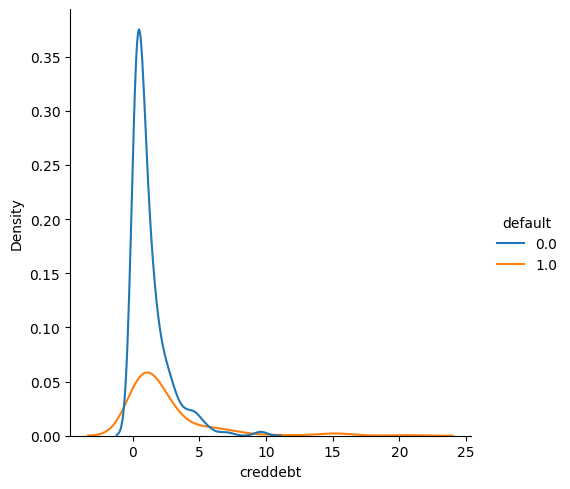

In [ ]:
sns.displot(x='creddebt', hue='default', data=df, kind='kde')

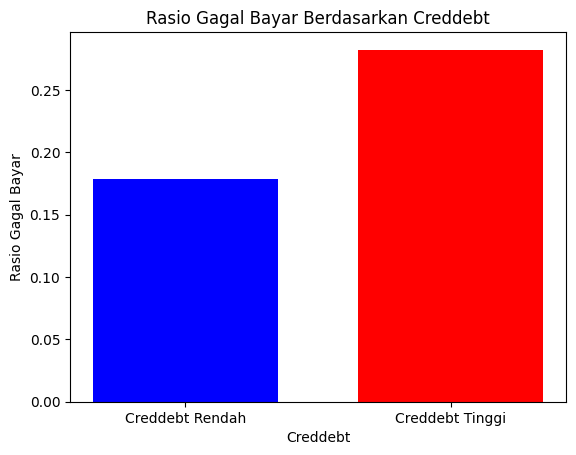

In [ ]:
# Visualisasi Rasio yang gagal bayar dan tidak bayar

# Pisahkan data berdasarkan rasio creddebt

df_creddebt_rendah = df[df['creddebt'] <= 0.3]
df_creddebt_tinggi = df[df['creddebt'] > 0.3]

# Hitung rasio gagal bayar untuk masing-masing kelompok data
rasio_gagal_bayar_rendah = len(df_creddebt_rendah[df_creddebt_rendah['default'] == 1]) / len(df_creddebt_rendah)
rasio_gagal_bayar_tinggi = len(df_creddebt_tinggi[df_creddebt_tinggi['default'] == 1]) / len(df_creddebt_tinggi)

# buat plot batang
plt.bar(
    x=['Creddebt Rendah', 'Creddebt Tinggi'],
    height=[rasio_gagal_bayar_rendah, rasio_gagal_bayar_tinggi],
    color=['blue', 'red'],
    width=0.7,
)

# Tambahkan judul dan label
plt.title('Rasio Gagal Bayar Berdasarkan Creddebt')
plt.xlabel('Creddebt')
plt.ylabel('Rasio Gagal Bayar')
plt.show()

<Axes: xlabel='creddebt', ylabel='ed'>

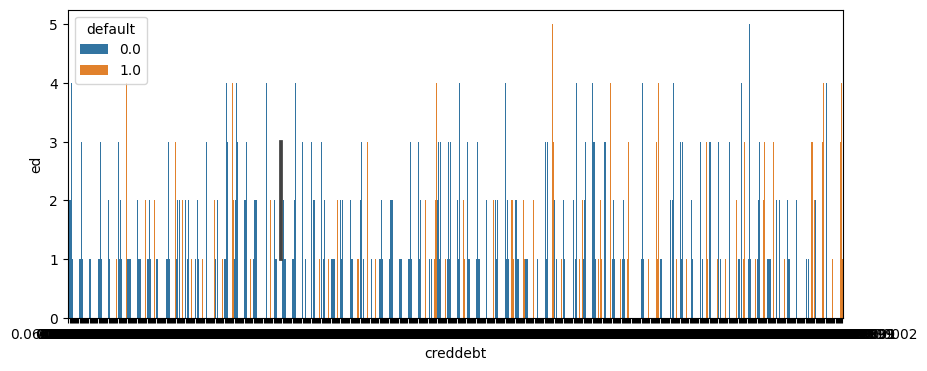

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x='creddebt', y='ed', hue='default', data=df)

<Figure size 1000x400 with 0 Axes>

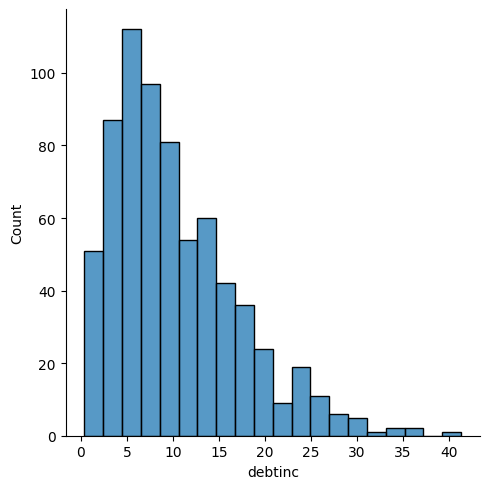

In [ ]:
plt.figure(figsize=(10,4))
sns.displot(x='debtinc', data=df)

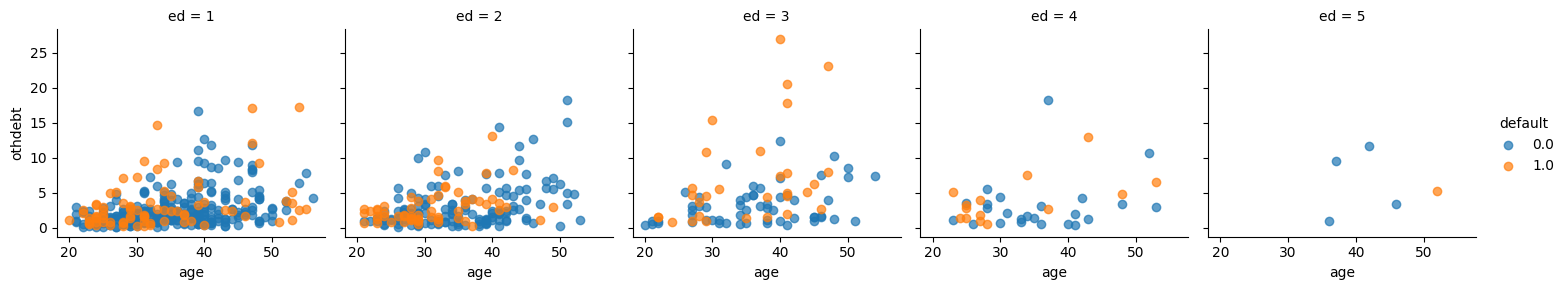

In [ ]:
scatplot=sns.FacetGrid(df, col="ed", hue="default")
scatplot.map(plt.scatter, "age", "othdebt", alpha=.7)
scatplot.add_legend()

# warna biru tidak gagal bayar
# warna oren gagal bayar

# interpretasi grafik visualisasi diatas
tingkat pendidikan 1
pada range umur 20-30 tingkat pendidikan 1, terjadi banyak gagal bayar

tingkat pendidikan 2
pada range umur 20-40 tingkat ED 2, terjadi banyak gagal bayar

tingkat pendidikan 3
pada range umur 30-45 tingkat ED 3, terjadi banyak gagal bayar

tingkat pendidikan 4
pada range umur 25-30 tingkat ED 4, terjadi banyak gagal bayar

tingkat pendidikan 5
pada umur > 50 tingkat ED 5, terjadi gagal bayar

Kesimpulan :
Untuk tingkat pendidikan 1 kemungkinan customer gagal bayar kebanykan di range umur 20-30,dst.

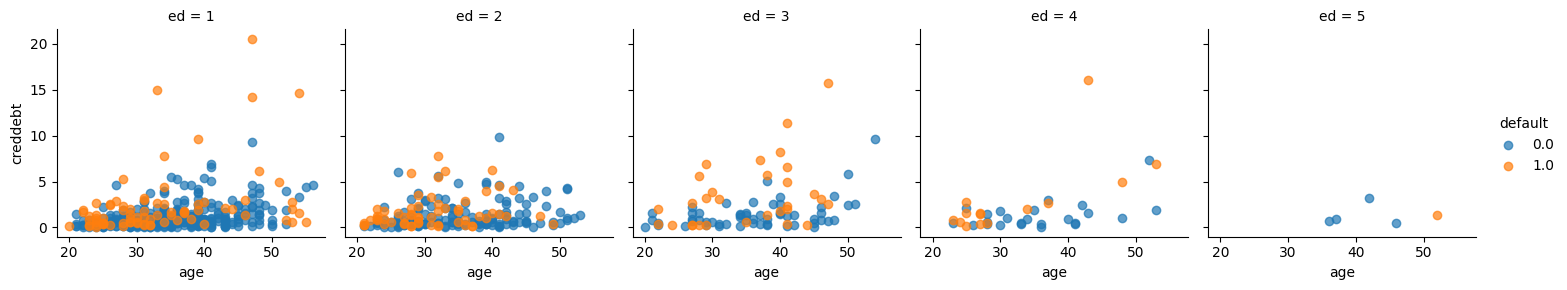

In [ ]:
scatplot=sns.FacetGrid(df, col="ed", hue="default")
scatplot.map(plt.scatter, "age", "creddebt", alpha=.7)
scatplot.add_legend()

# warna biru tidak gagal bayar
# warna oren gagal bayar

In [ ]:
import plotly.express as px

fig = px.scatter(df, x='creddebt', y='othdebt', color='default',
                 size='income', hover_data=['age'])
fig.show()

## Data Preparation


1.  Tidak ada temuan missing value
2.  Hanya digunakan 1 table



## Data Modelling

In [ ]:
#Split Training and Testing

from sklearn.model_selection import train_test_split # Import train_tes_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# Input Variabel

x=df[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']]

# Target variabel
y=df['default'].astype('category')

In [ ]:
# untuk pemodelan, maka kita harus membagi data training dan testing. Supaya kita bisa mengukur akurasi/error predict
#Karena ini merupakan supervised learning maka harus ada pembagian training dan testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
#Evaluation Model

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

# Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Import Decision Tree Classifier

In [ ]:
#Object Decision Tree
clf=DecisionTreeClassifier()

#Training Model
model_clf=clf.fit(x_train,y_train)

# Predict Model

y_pred_clf=model_clf.predict(x_test)

# Evaluasi Model Decision Tree

In [ ]:
# Evaluasi Klasifikasi

print(classification_report(y_test,y_pred_clf))

              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77       155
         1.0       0.39      0.47      0.43        55

    accuracy                           0.67       210
   macro avg       0.59      0.60      0.60       210
weighted avg       0.69      0.67      0.68       210



# Evaluasi

1.   Model dalam mempredik orang yang ** Tidak Gagal Bayar ** akurasi sebesar 80%,sedangkan overall accuracy 67% jadi bisa disimpulkan bahwa model UNDERFIT dalam mempredik orang yang ** TIDAK GAGAL BAYAR **
2.   Model OVERFIT dalam mempredik orang yang ** GAGAL BAYAR **. Hal ini ditunjukkkan nilai precisi 39% dan nilai akurasi overal 67%. Artinya precisi lebih rendah daripada akurasi (High akurasi and low precisi)
3. Berdasarkan confustion matrix, maka model pintar dalam mem predict orang yang tidak gagal bayar.
4. Model menggunakan Decision Tree tidak bisa diimplementasi pada case ini.



Text(113.9222222222222, 0.5, 'Predict label')

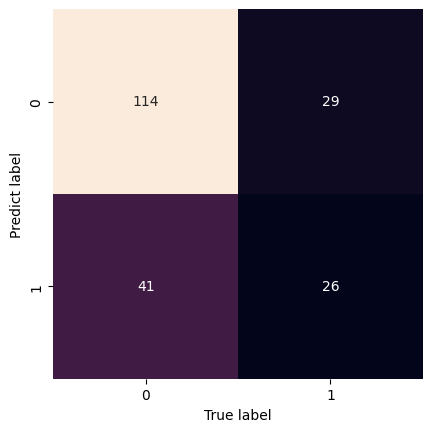

In [ ]:
# Memvisualisasikan Confustion Matrix

mat=confusion_matrix(y_test,y_pred_clf)
sns.heatmap(mat.T,square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True label')
plt.ylabel('Predict label')

<Axes: >

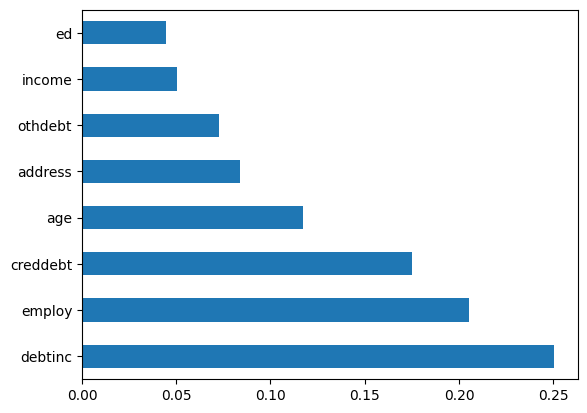

In [ ]:
# Signifikan Factor dari model

feat_importances=pd.Series(model_clf.feature_importances_,index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

# Pemodelan Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
#Object Random Forest
rf=RandomForestClassifier(n_estimators=200, max_depth=6)

#Training Model
model_rf=rf.fit(x_train,y_train)

# Predict Model

y_pred_rf=model_rf.predict(x_test)

# Evaluasi Model Random Forest

In [ ]:
# Evaluasi Model Random Forest

print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87       155
         1.0       0.68      0.38      0.49        55

    accuracy                           0.79       210
   macro avg       0.74      0.66      0.68       210
weighted avg       0.78      0.79      0.77       210



# Hasil Evaluasi Pemodelan Random Forest

1.   Model dalam mempredik orang yang ** Tidak Gagal Bayar ** akurasi sebesar 81%,sedangkan overall accuracy 79% jadi bisa disimpulkan bahwa model Underfitting dalam mempredik orang yang ** TIDAK GAGAL BAYAR **
2.   Model Overfitting dalam mempredik orang yang ** GAGAL BAYAR **. Hal ini ditunjukkkan nilai precisi 68% dan nilai akurasi overal 79%. Artinya precisi lebih rendah daripada akurasi (High akurasi and low precisi)
3. Berdasarkan confustion matrix, maka model pintar dalam mem predict orang yang tidak gagal bayar.
4. Model menggunakan Random Forest tidak bisa diimplementasi pada case ini.

# Hasil Evaluasi setelah tunning model dengan menambahkan Hyperparameter

1.   Model dinilai tepat dalam memprediksi nilai 0 ( orang yang ** TIDAK GAGAL BAYAR )
2.   Model masih Overfitting dalam mempredik nilai 1 (orang yang ** GAGAL BAYAR **). Hal ini ditunjukkkan nilai precisi 68% dan nilai akurasi overal 79%. Artinya precisi lebih rendah daripada akurasi (High akurasi and low precisi)
3. Berdasarkan confustion matrix, maka model pintar dalam mem predict orang yang tidak gagal bayar.
4. Model menggunakan Random Forest tidak bisa diimplementasi pada case ini.

Text(113.9222222222222, 0.5, 'Predict label')

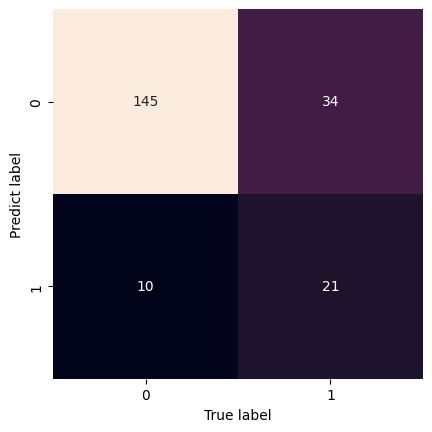

In [ ]:
# Memvisualisasikan Confustion Matrix Random Forest

mat=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(mat.T,square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True label')
plt.ylabel('Predict label')

<Axes: >

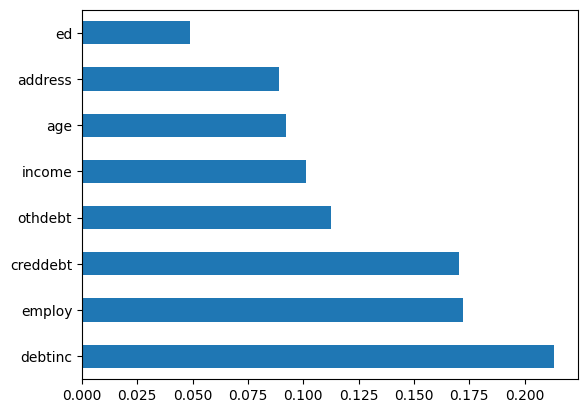

In [ ]:
# Signifikan Factor dari model Random Forest

feat_importances=pd.Series(model_rf.feature_importances_,index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

# Pemodelan SVM

In [ ]:
# Import SVM
from sklearn.svm import SVC

In [ ]:
#Object SVM
svm=SVC(kernel='linear',random_state=0)

#Training Model
model_svm=svm.fit(x_train,y_train)

# Predict Model

y_pred_svm=model_svm.predict(x_test)

# Evaluasi Model SVM

In [ ]:
# Evaluasi Model SVM

print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88       155
         1.0       0.73      0.44      0.55        55

    accuracy                           0.81       210
   macro avg       0.78      0.69      0.71       210
weighted avg       0.80      0.81      0.79       210



# Hasil Evaluasi Pemodelan SVM

1.   Model akurat dalam mempredik orang yang ** Tidak Gagal Bayar ** akurasi sebesar 82%,sedangkan overall accuracy 81% jadi bisa disimpulkan bahwa model tepat dalam mempredik orang yang ** TIDAK GAGAL BAYAR **
2.   Model Overfitting dalam mempredik orang yang ** GAGAL BAYAR **. Hal ini ditunjukkkan nilai precisi 73% dan nilai akurasi overal 81%. Artinya precisi lebih rendah daripada akurasi (High akurasi and low precisi)
3. Berdasarkan confustion matrix, maka model pintar dalam mem predict orang yang tidak gagal bayar.
4. Model menggunakan SVM tidak bisa diimplementasi pada case ini.

Text(113.9222222222222, 0.5, 'Predict label')

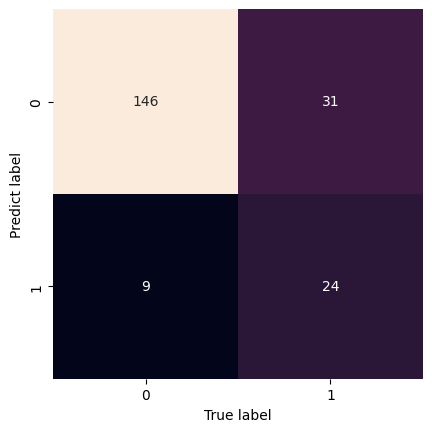

In [ ]:
# Memvisualisasikan Confustion Matrix SVM

mat=confusion_matrix(y_test,y_pred_svm)
sns.heatmap(mat.T,square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True label')
plt.ylabel('Predict label')

# Pemodelan menggunakan XGBOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#Object XGBOOST XGBClassifier
xgb=XGBClassifier()

#Training Model
model_xgb=xgb.fit(x_train,y_train)

# Predict Model

y_pred_xgb=model_xgb.predict(x_test)

# Evaluasi model XGBOOST

In [ ]:
# Evaluasi Model XGBOOST

print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       155
         1.0       0.57      0.44      0.49        55

    accuracy                           0.77       210
   macro avg       0.69      0.66      0.67       210
weighted avg       0.75      0.77      0.76       210



Text(113.9222222222222, 0.5, 'Predict label')

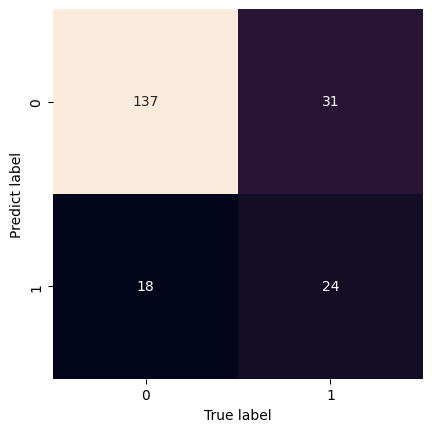

In [ ]:
# Memvisualisasikan Confustion Matrix XGBOOST

mat=confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(mat.T,square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True label')
plt.ylabel('Predict label')

# Hasil evaluasi XGBOOST

1. Model Underfit untuk mempredik orang yang TIDAK GAGAL BAYAR dengan tingkat akurasi 77% dan presisi TIDAK GAGAL BAYAR 82%.
2. Model Overfit untuk mempredik orang yang GAGAL BAYAR dengan tingkat akurasi 77% dan presisi 57%.
3. Berdasarkan confustion matrix, maka model pintar dalam mem predict orang yang tidak gagal bayar.
4. Model menggunakan Random Forest tidak bisa diimplementasi pada case ini.

<Axes: >

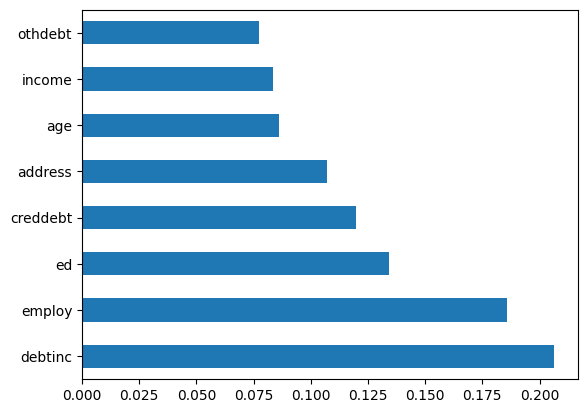

In [ ]:
# Signifikan Factor dari model XGBOOST

feat_importances=pd.Series(model_xgb.feature_importances_,index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

# CONCLUSION

1. Kita akan menggunakan model SVM untuk implementasi Machine Learning dalam memutuskan mana nasabah yg akan diterima permohonan kreditnya.

# Implementasi Machine Learning Model SVM

In [ ]:
#Loading Data New Nasabah

path_newNasabah='/content/drive/MyDrive/DataSource/credit_risk_newCust.csv'
load_data_newNasabah=pd.read_csv(path_newNasabah)

load_data_newNasabah.head()

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,700,36,1,16,13,32,10.9,0.544128,2.943872,NaN
1,701,50,1,6,27,21,12.9,1.316574,1.392426,NaN
2,702,40,1,9,9,33,17.0,4.880700,0.729300,NaN
3,703,31,1,5,7,23,2.0,0.046000,0.414000,NaN
4,704,29,1,4,0,24,7.8,0.866736,1.005264,NaN


In [ ]:
df_newNasabah = pd.DataFrame(load_data_newNasabah)

df_newNasabah

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,700,36,1,16,13,32,10.9,0.544128,2.943872,NaN
1,701,50,1,6,27,21,12.9,1.316574,1.392426,NaN
2,702,40,1,9,9,33,17.0,4.880700,0.729300,NaN
3,703,31,1,5,7,23,2.0,0.046000,0.414000,NaN
4,704,29,1,4,0,24,7.8,0.866736,1.005264,NaN
...,...,...,...,...,...,...,...,...,...,...
145,845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
146,846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
147,847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
148,848,35,2,1,11,24,7.8,0.417456,1.454544,NaN


In [ ]:
df_newNasabah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  150 non-null    int64  
 1   age         150 non-null    int64  
 2   ed          150 non-null    int64  
 3   employ      150 non-null    int64  
 4   address     150 non-null    int64  
 5   income      150 non-null    int64  
 6   debtinc     150 non-null    float64
 7   creddebt    150 non-null    float64
 8   othdebt     150 non-null    float64
 9   default     0 non-null      float64
dtypes: float64(4), int64(6)
memory usage: 11.8 KB


In [ ]:
# Input Variabel
x1=df_newNasabah[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']]


# Applying Model SVM

In [ ]:
y_predict_newNasabah=model_svm.predict(x1)

y_predict_newNasabah

array([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# Mengubah hasil pemodelan yg berbentuk Array menjadi DataFrame
df_predict_newNasabah=pd.DataFrame({'Prediction_GagalBayat':y_predict_newNasabah}).round(2)

df_predict_newNasabah

,Prediction_GagalBayat
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
145,0.0
146,0.0
147,0.0
148,0.0


In [ ]:
# Menggabungkan Dataset NewNasabah dengan Hasil Predict nya

df_hasil_predict_svm=pd.concat([df_newNasabah,df_predict_newNasabah], sort=False, axis=1)

df_hasil_predict_svm.head()

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,Prediction_GagalBayat
0,700,36,1,16,13,32,10.9,0.544128,2.943872,NaN,0.0
1,701,50,1,6,27,21,12.9,1.316574,1.392426,NaN,0.0
2,702,40,1,9,9,33,17.0,4.880700,0.729300,NaN,1.0
3,703,31,1,5,7,23,2.0,0.046000,0.414000,NaN,0.0
4,704,29,1,4,0,24,7.8,0.866736,1.005264,NaN,0.0


In [ ]:
# Export to excel

# Export as download if in colab
from google.colab import files

file_predict_newNasabah=df_hasil_predict_svm.to_excel('file_predict_newNasabahCreditrisk.xlsx', sheet_name='predict')
files.download('file_predict_newNasabahCreditrisk.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_hasil_predict_svm['Prediction_GagalBayat'].value_counts()

0.0    127
1.0     23
Name: Prediction_GagalBayat, dtype: int64


2. prediksi nilai kredit yang akan diberikan kepada nasabah lama (old nasabah).

Problem : Estimasi

kemungkinan Algoritma yg akan digunakan :

1. Linear Regression
2. MLP Regressor (ANN)

In [ ]:
# Create Object Baru

df_oldNasabah=df

df_oldNasabah.head()

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [ ]:
df_oldNasabah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  700 non-null    int64  
 1   age         700 non-null    int64  
 2   ed          700 non-null    int64  
 3   employ      700 non-null    int64  
 4   address     700 non-null    int64  
 5   income      700 non-null    int64  
 6   debtinc     700 non-null    float64
 7   creddebt    700 non-null    float64
 8   othdebt     700 non-null    float64
 9   default     700 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 54.8 KB


In [ ]:
# Kenaikan Nilai kredit diberikan kepada nasabah lama yang tidak pernah gagal bayar dan creddebt dibawah 30%

df_oldNasabah1=df_oldNasabah[(df_oldNasabah['default']==0)&(df_oldNasabah['creddebt']<0.3)]

df_oldNasabah1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 7 to 693
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  115 non-null    int64  
 1   age         115 non-null    int64  
 2   ed          115 non-null    int64  
 3   employ      115 non-null    int64  
 4   address     115 non-null    int64  
 5   income      115 non-null    int64  
 6   debtinc     115 non-null    float64
 7   creddebt    115 non-null    float64
 8   othdebt     115 non-null    float64
 9   default     115 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 9.9 KB


In [ ]:
df_oldNasabah1

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
7,7,43,1,12,11,38,3.6,0.128592,1.239408,0.0
10,10,27,1,0,1,16,1.7,0.182512,0.089488,0.0
11,11,25,1,4,0,23,5.2,0.252356,0.943644,0.0
19,19,41,3,0,21,26,1.7,0.099008,0.342992,0.0
29,29,26,3,2,1,37,14.2,0.204906,5.049094,0.0
...,...,...,...,...,...,...,...,...,...,...
679,679,35,1,17,4,42,3.0,0.093240,1.166760,0.0
683,683,21,1,1,1,16,6.3,0.141120,0.866880,0.0
689,689,30,1,4,2,18,10.7,0.227268,1.698732,0.0
690,690,24,2,0,5,16,7.3,0.024528,1.143472,0.0


<Axes: title={'center': 'Pearson Correlation'}>

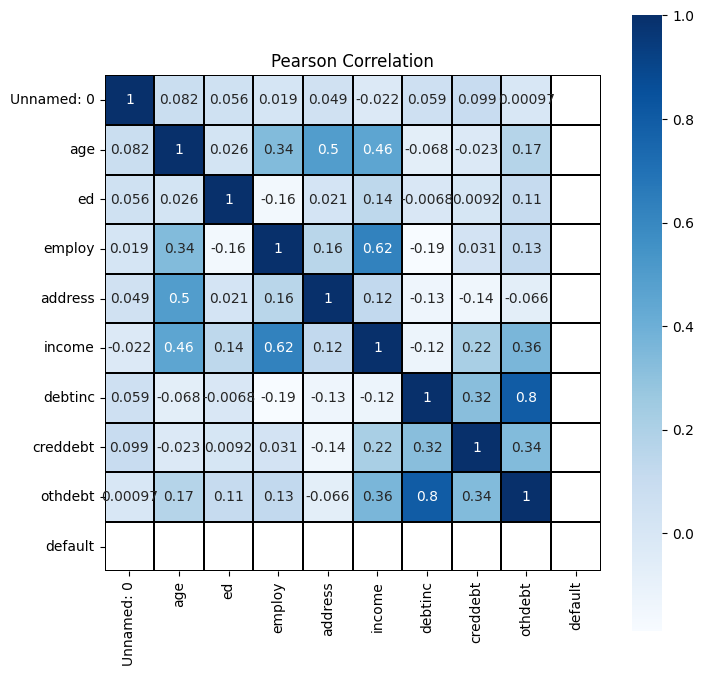

In [ ]:
f,ax=plt.subplots(figsize=(8,8))
plt.title("Pearson Correlation")
sns.heatmap(df_oldNasabah1.astype(float).corr(),linewidth=0.25, vmax=1.0, square=True, cmap='Blues', linecolor='black', annot=True)

In [ ]:
# Menentukan Input Variabel

x2=df_oldNasabah1[['age', 'ed', 'employ', 'address', 'debtinc', 'creddebt', 'othdebt', 'default']]

# Menentukan Target variabel
y2=df_oldNasabah1['']